In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np
import sympy
from sympy import *

In [68]:
MSE = []
solved = 0
unsolved = 0

for ran_idx in range(100):
    try:
        random.seed(ran_idx)
        np.random.seed(ran_idx)
        source = [random.uniform(-3,3),random.uniform(0,5)]
        mic1 = [-2,1]
        mic2 = [0,0]
        mic3 = [2,1]

        locations = np.zeros([4,2])
        locations[0] = source
        locations[1] = mic1
        locations[2] = mic2
        locations[3] = mic3

        mu = np.array([0,0,0])
        sigma = np.array([0.1,0.1,0.1])

        noise = np.random.normal(mu,sigma)

        d1 = np.sqrt((locations[0,0]-locations[1,0])**2 + (locations[0,1]-locations[1,1])**2) + noise[0]
        d2 = np.sqrt((locations[0,0]-locations[2,0])**2 + (locations[0,1]-locations[2,1])**2) + noise[1]
        d3 = np.sqrt((locations[0,0]-locations[3,0])**2 + (locations[0,1]-locations[3,1])**2) + noise[2]

        d_diff = np.array([d1-d2,d1-d3,d2-d3])

        def f(x,y,idx):
            return ((x-locations[idx,0])**2 + (y-locations[idx,1])**2)**0.5

        x = Symbol('x')
        y = Symbol('y')
        
        try:
            soln = nsolve([f(x,y,1)-f(x,y,2)-d_diff[0], f(x,y,1)-f(x,y,3)-d_diff[1], f(x,y,2)-f(x,y,3)-d_diff[2]],[x,y],[-2.5,5])
        except:
            soln = nsolve([f(x,y,1)-f(x,y,2)-d_diff[0], f(x,y,1)-f(x,y,3)-d_diff[1], f(x,y,2)-f(x,y,3)-d_diff[2]],[x,y],[2.5,5])

        mse = (soln[0]-locations[0,0])**2 + (soln[1]-locations[0,1])**2

        if mse > 1:
            unsolved += 1
        else:
            solved += 1
            MSE.append(mse)
        
    except:
        #print('unable to solve')
        unsolved += 1
        continue

mean_MSE = np.mean(MSE)

print('Number of cases solved:', solved)
print('Number of unsolved cases:', unsolved)

Number of cases solved: 75
Number of unsolved cases: 25
The mean MSE of solved cases is: 0.236490618429010


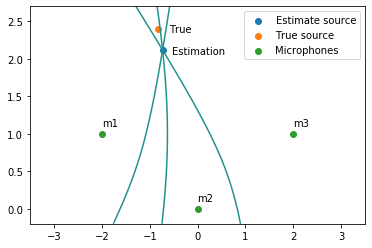

In [63]:
x = np.linspace(-3.5,3.5,500)
y = np.linspace(-0.2,2.7,500)

X,Y = np.meshgrid(x,y)

plt.contour(X,Y,f(X,Y,1)-f(X,Y,2)-d_diff[0],0)
plt.contour(X,Y,f(X,Y,1)-f(X,Y,3)-d_diff[1],0)
plt.contour(X,Y,f(X,Y,2)-f(X,Y,3)-d_diff[2],0)
plt.scatter(soln[0], soln[1], label='Estimate source')
plt.scatter(locations[0,0], locations[0,1], label='True source')
plt.scatter(locations[1:,0], locations[1:,1], label='Microphones')

labels = ['True', 'm1', 'm2', 'm3']
plt.annotate('Estimation', (soln[0]+0.2, soln[1]-0.05))
plt.annotate(labels[0], (locations[0,0]+0.24, locations[0,1]-0.05))
for i in range(1,4):
    plt.annotate(labels[i], (locations[i,0], locations[i,1]+0.1))
plt.legend(loc='upper right')
plt.show()